<div class="alert alert-block alert-success">
    
# FIT5196 Task 3 in Assessment 1
#### Student Name: Michael Xie
#### Student ID: 31842819

Date: 24/08/2024


Environment: Python 3.11.9

Libraries used:
* xxxxx
* xxxxx
    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Raw Data(given input file from task1)](#examine1) <br>
[4. Examining metadata](#examine2) <br>
[5. Data Analysis](#DA) <br>
    - [5.1 Question 1: How is xxxx related to xxxx?](#DI1) <br>
    - [5.2 Question 2: How does xxxxxx impact the rating of a business?](#DI2) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

xxxxxxxxxx

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div> 

The packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:

* **re:** to define and use regular expressions
* **pandas:** ...
* ...

In [318]:
import re 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import folium
from branca.colormap import linear
from collections import defaultdict

<div class="alert alert-block alert-warning">

## 3.  Examining Raw Data(given input file from task1) <a class="anchor" name="examine1"></a>

 </div>

In [319]:
review_df = pd.read_excel(r"test3.xlsx")
review_df.head()
#review_df = pd.read_json('task1_30.json')

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response
0,0x80c2b62d3ad1385f:0x134c0ae51a64e340,111879057746007898782,2019-02-07 18:49:08,4,"my ""expert foodie friends"" have been telling m...",N,[],N
1,0x80c2b62d3ad1385f:0x134c0ae51a64e340,101905598065020101585,2018-09-20 20:07:00,4,beautiful atmosphere. great food and amazing s...,N,[],N
2,0x80c2b62d3ad1385f:0x134c0ae51a64e340,107641378831752487602,2019-01-20 06:51:19,4,love how hidden this joint was in downtown los...,N,[],N
3,0x80c2b62d3ad1385f:0x134c0ae51a64e340,106296655996491216483,2019-01-21 06:14:42,5,one of my favorite spots for delicious seafood...,N,[],N
4,0x80c2b62d3ad1385f:0x134c0ae51a64e340,114797512876374566333,2019-02-12 00:16:22,5,seafood and the atmosphere here is quality. fo...,N,[],N


In [320]:
review_df.shape

(36598, 8)

In [321]:
review_df.columns

Index(['gmap_id', 'user_id', 'time', 'review_rating', 'review_text', 'if_pic',
       'pic_dim', 'if_response'],
      dtype='object')

In [322]:
review_df.dtypes

gmap_id          object
user_id          object
time             object
review_rating     int64
review_text      object
if_pic           object
pic_dim          object
if_response      object
dtype: object

In [323]:
review_df['time'] = pd.to_datetime(review_df['time'])

In [324]:
review_df.head()

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response
0,0x80c2b62d3ad1385f:0x134c0ae51a64e340,111879057746007898782,2019-02-07 18:49:08,4,"my ""expert foodie friends"" have been telling m...",N,[],N
1,0x80c2b62d3ad1385f:0x134c0ae51a64e340,101905598065020101585,2018-09-20 20:07:00,4,beautiful atmosphere. great food and amazing s...,N,[],N
2,0x80c2b62d3ad1385f:0x134c0ae51a64e340,107641378831752487602,2019-01-20 06:51:19,4,love how hidden this joint was in downtown los...,N,[],N
3,0x80c2b62d3ad1385f:0x134c0ae51a64e340,106296655996491216483,2019-01-21 06:14:42,5,one of my favorite spots for delicious seafood...,N,[],N
4,0x80c2b62d3ad1385f:0x134c0ae51a64e340,114797512876374566333,2019-02-12 00:16:22,5,seafood and the atmosphere here is quality. fo...,N,[],N


In [325]:
review_df.describe(include='all')

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response
count,36598,36598,36598,36598.000000,36575,36598,36598,36598
unique,176,35715,NaN,NaN,19739,2,24,2
top,0x80dd31941bd88101:0x24ef065e89051282,116535190851168531218,NaN,NaN,none,N,[],N
freq,1880,4,NaN,NaN,15438,34456,35724,32170
mean,NaN,NaN,2019-03-21 02:03:16.971692288,4.364118,NaN,NaN,NaN,NaN
min,NaN,NaN,2008-02-05 13:00:44,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2018-05-27 09:20:56.750000128,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2019-05-12 12:32:01.500000,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020-03-06 05:35:07.750000128,5.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,2021-08-25 16:57:30,5.000000,NaN,NaN,NaN,NaN


In [326]:
review_df['review_rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [327]:
review_df.isnull().sum()

gmap_id           0
user_id           0
time              0
review_rating     0
review_text      23
if_pic            0
pic_dim           0
if_response       0
dtype: int64

### **2. Summarize Key Features and Variables:**

- **gmap_id**: Unique identifier for each business
- **user_id**: Unique identifier for each user
- **time**: Timestamp of when the review was submitted in format 'YYYY-MM-DD tt:hh:ss' - ranges from 2008 to 2021
- **review_rating**: Integer review rating between 1-5 
- **review_text**: Preprocessed body of review ('None' if no review text)
- **if_pic**: Boolean (Y/N) indicator for whether user has submitted pictures. 
- **pic_dim**: List of picture dimensions ('[]' if no picture)
- **if_response**: Boolean (Y/N) indicator showing if there was a response to the review from the business.


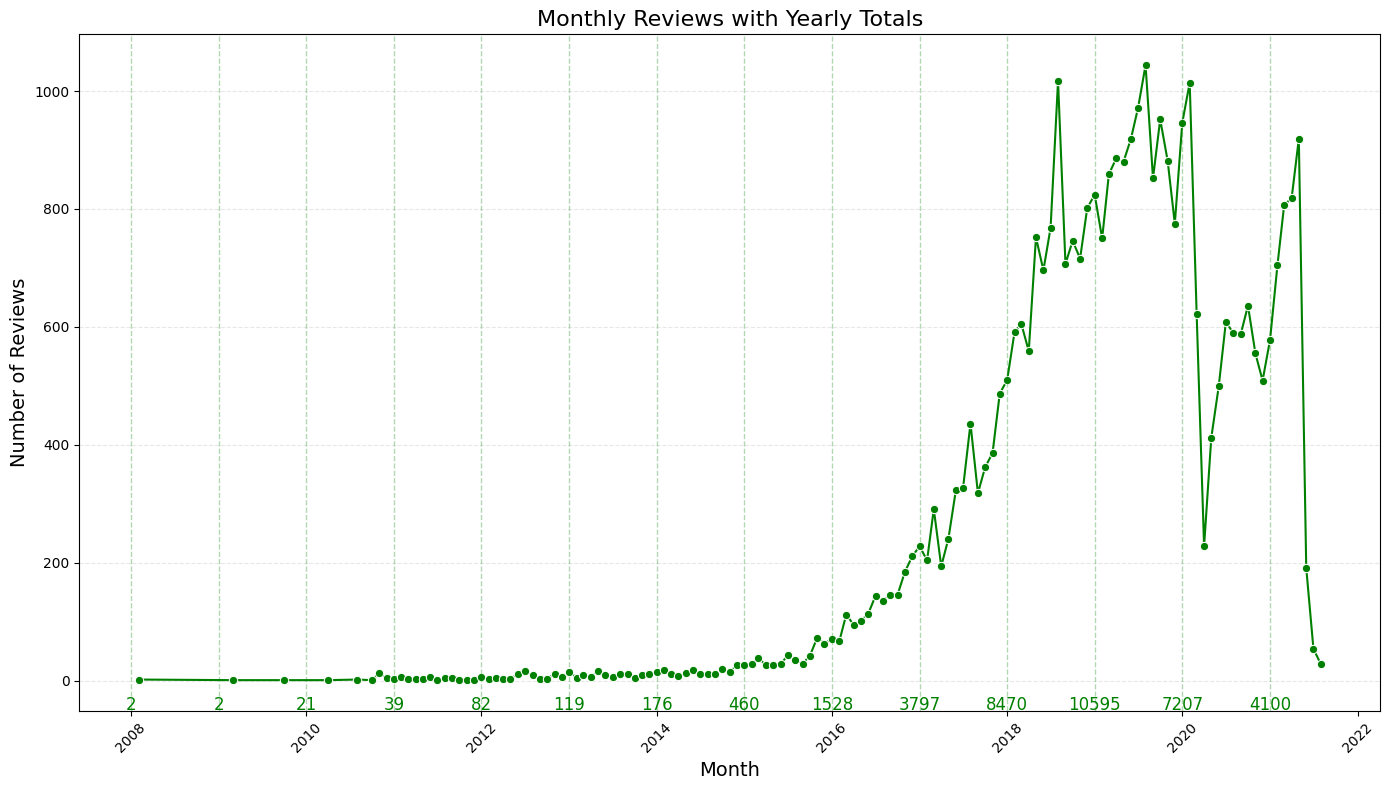

In [328]:

# Convert 'time' to datetime object 
review_df['time'] = pd.to_datetime(review_df['time'])

# Extract year and month and append as new columns 
review_df['year'] = review_df['time'].dt.year
review_df['month'] = review_df['time'].dt.to_period('M').astype(str)  

# Calculate monthly totals
monthly_totals = review_df.groupby('month').size().reset_index(name='total_reviews')
monthly_totals['month'] = pd.to_datetime(monthly_totals['month'], format='%Y-%m')

# Calculate yearly totals
yearly_totals = review_df.groupby('year').size().reset_index(name='total_reviews')
yearly_totals['year'] = yearly_totals['year'].astype(str)

# Line graph intialisation 
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_totals, x='month', y='total_reviews', marker='o', color='green')

# Add yearly total labels onto graph
for index, row in yearly_totals.iterrows():
    year_start_date = pd.to_datetime(f'{row["year"]}-01-01')
    plt.axvline(x=year_start_date, linestyle='--', color='green', linewidth=1, alpha=0.3)
    
    # Vertical position of labels
    y_pos = monthly_totals['total_reviews'].min() -50
    
    plt.text(year_start_date, y_pos, f'{row["total_reviews"]}', color='green', ha='center', fontsize=12)

plt.title('Monthly Reviews with Yearly Totals', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


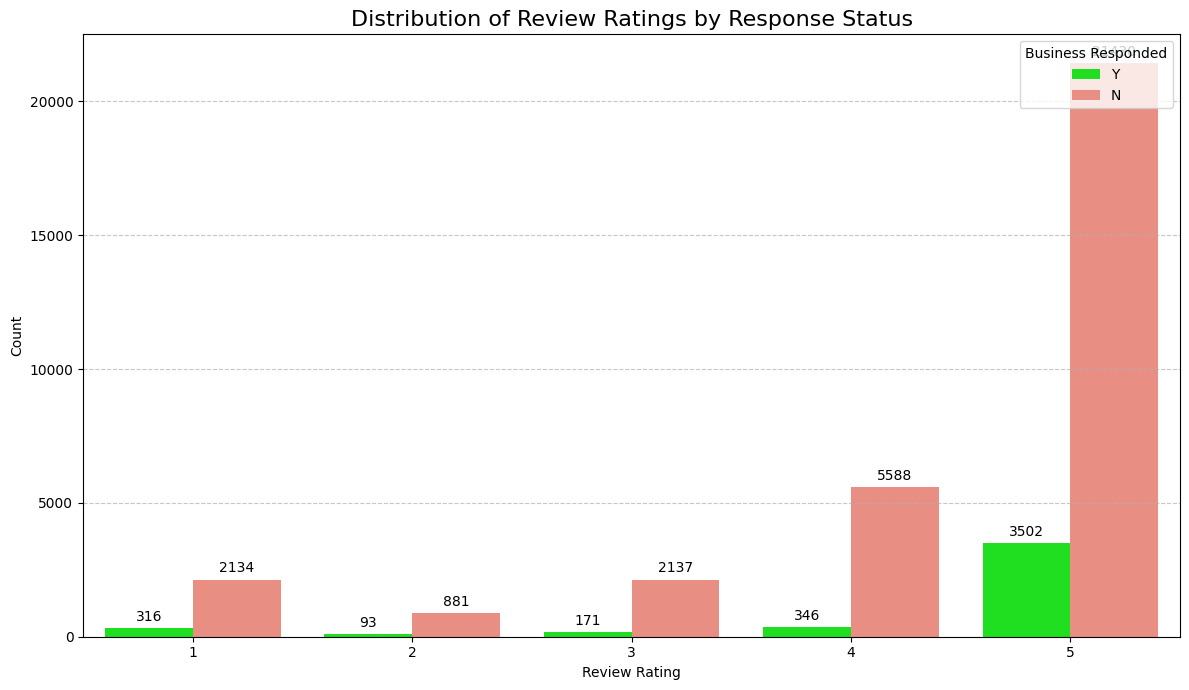

In [329]:

# Generate bar graph for review_rating distribution with response categories
plt.figure(figsize=(12, 7))

palette = {'Y': 'lime', 'N': 'salmon'}
ax = sns.countplot(data=review_df, x='review_rating', hue='if_response', palette=palette)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Customize the plot
plt.title('Distribution of Review Ratings by Response Status', fontsize=16)
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.legend(title='Business Responded', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


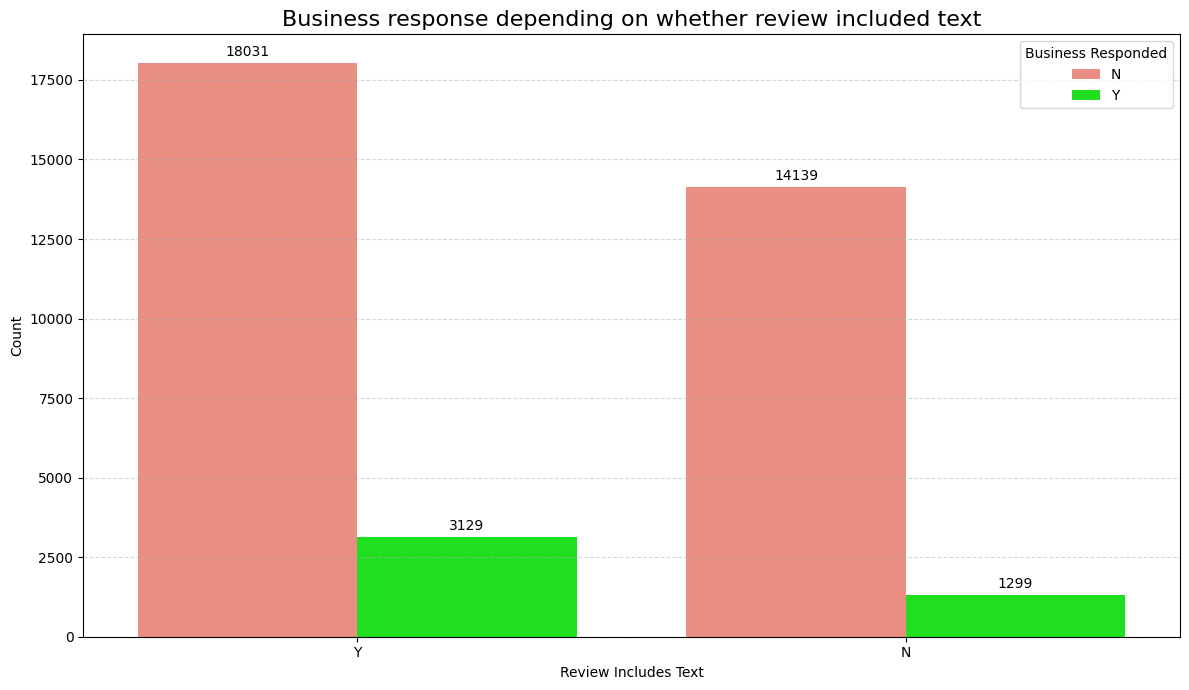

In [330]:
review_df['if_text'] = review_df['review_text'].apply(lambda x: 'Y' if x != 'none' else 'N')
palette = {'Y': 'lime', 'N': 'salmon'}
# Generate bar graph for count of reviews with review text 
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=review_df, x='if_text', hue='if_response', palette=palette)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)


# Customize the plot
plt.title('Business response depending on whether review included text', fontsize=16)
plt.xlabel('Review Includes Text')
plt.ylabel('Count')
plt.legend(title='Business Responded', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### **Visualisations:**

In [331]:
aggregated_review_df = review_df.groupby('gmap_id').agg(
    review_count=('gmap_id', 'size'),
    user_count = ('user_id', 'size'),
    time_count = ('time', 'median'),
    avg_rating = ('review_rating', 'mean'),
    review_text_count=('review_text', lambda x: (x != 'none').sum()),
    pic_count = ('if_pic', lambda x: (x == 'Y').sum()),
    response_count=('if_response', lambda x: (x == 'Y').sum()),

)

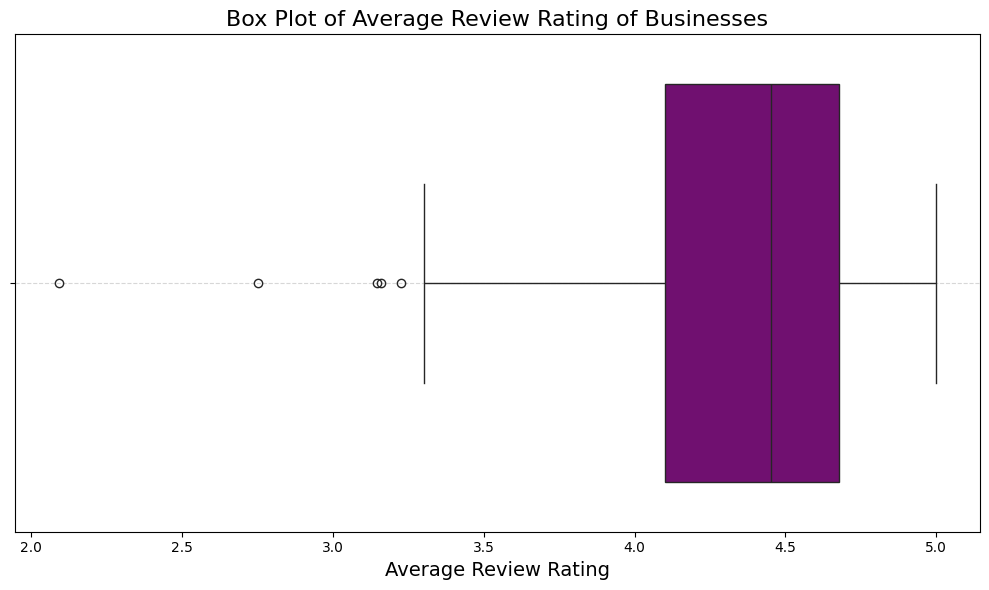

In [332]:
plt.figure(figsize=(10, 6))
# Boxplot for avg review ratings 
sns.boxplot(data=aggregated_review_df, x='avg_rating', color='purple')

# Customize the plot
plt.title('Box Plot of Average Review Rating of Businesses', fontsize=16)
plt.xlabel('Average Review Rating', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">

## 4.  Examining Metadata <a class="anchor" name="examine2"></a>

 </div>

In [333]:
meta_df = pd.read_json(r"meta-California.json", lines=True)
meta_df.head()

meta_df.to_excel("meta_data.xlsx", index=False)

In [334]:
meta_df.shape

(515961, 15)

In [335]:
meta_df.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,515961.000000,515961.000000,515961.000000,515961.000000
mean,35.538558,-119.412233,4.278333,136.696334
std,2.137430,3.410867,0.627410,375.423986
min,21.881041,-140.173392,1.000000,1.000000
25%,33.897430,-121.574379,4.000000,8.000000
50%,34.218867,-118.448297,4.400000,33.000000
75%,37.680093,-117.868463,4.700000,108.000000
max,44.393000,180.000000,5.000000,9998.000000


In [336]:
meta_df.dtypes

name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object

In [337]:
meta_df.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

In [338]:
meta_df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
1,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Matrix International Textiles,"Matrix International Textiles, 1363 S Bonnie B...",0x80c2cf163db6bc89:0x219484e2edbcfa41,None,34.015505,-118.181839,[Fabric store],3.5,6,None,"[[Thursday, 8:30AM–5:30PM], [Friday, 8:30AM–5:...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5:30PM,"[0x80c2cf042a5d9561:0xd0024ad6f81f1335, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [339]:
meta_df.isnull().sum()

name                    10
address               7704
gmap_id                  0
description         404040
latitude                 0
longitude                0
category              2376
avg_rating               0
num_of_reviews           0
price               406160
hours               100979
MISC                 82923
state               143713
relative_results     40464
url                      0
dtype: int64

In [340]:
merged_df = pd.merge(review_df, meta_df, on='gmap_id', how='left')



In [341]:
columns = ['avg_rating', 'num_of_reviews', 'state', 'relative_results']
merged_df = merged_df.drop(columns=columns)

In [342]:
merged_df.shape

(36690, 21)

In [358]:
merged_df.head(5)

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response,year,month,...,description,latitude,longitude,category,price,hours,MISC,url,transformed_MISC,encoded_price
0,0x80c2b62d3ad1385f:0x134c0ae51a64e340,111879057746007898782,2019-02-07 18:49:08,4,"my ""expert foodie friends"" have been telling m...",N,[],N,2019,2019-02,...,None,33.968945,-118.308815,None,None,"[[Sunday, 12–7:30PM], [Monday, 11AM–7:30PM], [...",None,https://www.google.com/maps/place//data=!4m2!3...,{},NaN
1,0x80c2b62d3ad1385f:0x134c0ae51a64e340,101905598065020101585,2018-09-20 20:07:00,4,beautiful atmosphere. great food and amazing s...,N,[],N,2018,2018-09,...,None,33.968945,-118.308815,None,None,"[[Sunday, 12–7:30PM], [Monday, 11AM–7:30PM], [...",None,https://www.google.com/maps/place//data=!4m2!3...,{},NaN
2,0x80c2b62d3ad1385f:0x134c0ae51a64e340,107641378831752487602,2019-01-20 06:51:19,4,love how hidden this joint was in downtown los...,N,[],N,2019,2019-01,...,None,33.968945,-118.308815,None,None,"[[Sunday, 12–7:30PM], [Monday, 11AM–7:30PM], [...",None,https://www.google.com/maps/place//data=!4m2!3...,{},NaN
3,0x80c2b62d3ad1385f:0x134c0ae51a64e340,106296655996491216483,2019-01-21 06:14:42,5,one of my favorite spots for delicious seafood...,N,[],N,2019,2019-01,...,None,33.968945,-118.308815,None,None,"[[Sunday, 12–7:30PM], [Monday, 11AM–7:30PM], [...",None,https://www.google.com/maps/place//data=!4m2!3...,{},NaN
4,0x80c2b62d3ad1385f:0x134c0ae51a64e340,114797512876374566333,2019-02-12 00:16:22,5,seafood and the atmosphere here is quality. fo...,N,[],N,2019,2019-02,...,None,33.968945,-118.308815,None,None,"[[Sunday, 12–7:30PM], [Monday, 11AM–7:30PM], [...",None,https://www.google.com/maps/place//data=!4m2!3...,{},NaN


In [344]:
merged_df.isnull().sum()

gmap_id              0
user_id              0
time                 0
review_rating        0
review_text         23
if_pic               0
pic_dim              0
if_response          0
year                 0
month                0
if_text              0
name                 0
address            476
description      18228
latitude             0
longitude            0
category            68
price            19516
hours             1738
MISC              1825
url                  0
dtype: int64

<div class="alert alert-block alert-warning">

## 5.  Data Analysis <a class="anchor" name="DA"></a>

 </div>

 In this section, we are looking into 5 data insights from the data. We believe that by looking into different factors that can impact on a business rating, we can have a better understanding on the importance of xxxxxxx.

 

## MISC

In [345]:
merged_df['MISC']

0                                                     None
1                                                     None
2                                                     None
3                                                     None
4                                                     None
                               ...                        
36685    {'Service options': ['No-contact delivery', 'D...
36686    {'Service options': ['No-contact delivery', 'D...
36687    {'Service options': ['No-contact delivery', 'D...
36688    {'Service options': ['No-contact delivery', 'D...
36689    {'Service options': ['No-contact delivery', 'D...
Name: MISC, Length: 36690, dtype: object

In [346]:
list = []
def parse_misc_data(row):
    
    misc_dict = {}
    if row is None or row =='None':
        return misc_dict
    else:
        return row


for row in merged_df['MISC']:
    list.append(parse_misc_data(row))

merged_df['transformed_MISC'] = merged_df['MISC'].apply(parse_misc_data)


In [347]:
def flatten_misc(misc_dict):
    flattened = {}
    for key, values in misc_dict.items():
        for value in values:
            flattened[f'{key}_{value}'] = 1
    return flattened

misc_expanded = merged_df['transformed_MISC'].apply(lambda x: pd.Series(flatten_misc(x)))

# Fill NaN values with 0s for binary encoding
misc_expanded = misc_expanded.fillna(0)

# Combine with original DataFrame
merged_df_combined = pd.concat([merged_df.drop(columns='transformed_MISC'), misc_expanded], axis=1)

merged_df_combined.head()

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response,year,month,...,Amenities_Toilets,Crowd_Family friendly,Crowd_University students,Service options_Same-day delivery,Offerings_Service guarantee,Atmosphere_Cosy,Highlights_Play area,From the business_Identifies as veteran-led,Health and safety_Staff wear masks,Amenities_Public restroom
0,0x80c2b62d3ad1385f:0x134c0ae51a64e340,111879057746007898782,2019-02-07 18:49:08,4,"my ""expert foodie friends"" have been telling m...",N,[],N,2019,2019-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0x80c2b62d3ad1385f:0x134c0ae51a64e340,101905598065020101585,2018-09-20 20:07:00,4,beautiful atmosphere. great food and amazing s...,N,[],N,2018,2018-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0x80c2b62d3ad1385f:0x134c0ae51a64e340,107641378831752487602,2019-01-20 06:51:19,4,love how hidden this joint was in downtown los...,N,[],N,2019,2019-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0x80c2b62d3ad1385f:0x134c0ae51a64e340,106296655996491216483,2019-01-21 06:14:42,5,one of my favorite spots for delicious seafood...,N,[],N,2019,2019-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0x80c2b62d3ad1385f:0x134c0ae51a64e340,114797512876374566333,2019-02-12 00:16:22,5,seafood and the atmosphere here is quality. fo...,N,[],N,2019,2019-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [348]:
# Identify the one-hot encoded columns
one_hot_columns = misc_expanded.columns

# Initialize an empty DataFrame to store the summary
attribute_summary = pd.DataFrame(columns=['attribute', 'average_review'])

# Calculate the average review rating for each attribute effect
for column in one_hot_columns:
    # Group by each one-hot encoded column and calculate the average review
    avg_review = merged_df_combined.groupby(column).agg(
        average_review=('review_rating', 'mean')
    ).reset_index()

    # Extract only the rows where the attribute is present (i.e., column value is 1)
    avg_review = avg_review[avg_review[column] == 1].drop(columns=[column])
    
    # Append the results to the summary DataFrame
    attribute_summary = pd.concat([attribute_summary, pd.DataFrame({'attribute': column, 'average_review': avg_review['average_review']})], ignore_index=True)

# Display the summary
print(attribute_summary.head())


                                      attribute  average_review
0  Accessibility_Wheelchair accessible entrance        4.311262
1             Planning_Appointments recommended        4.695009
2     From the business_Identifies as women-led        4.511158
3             Service options_In-store shopping        4.401548
4                 Health & safety_Mask required        4.366515


In [349]:
type(attribute_summary)

pandas.core.frame.DataFrame

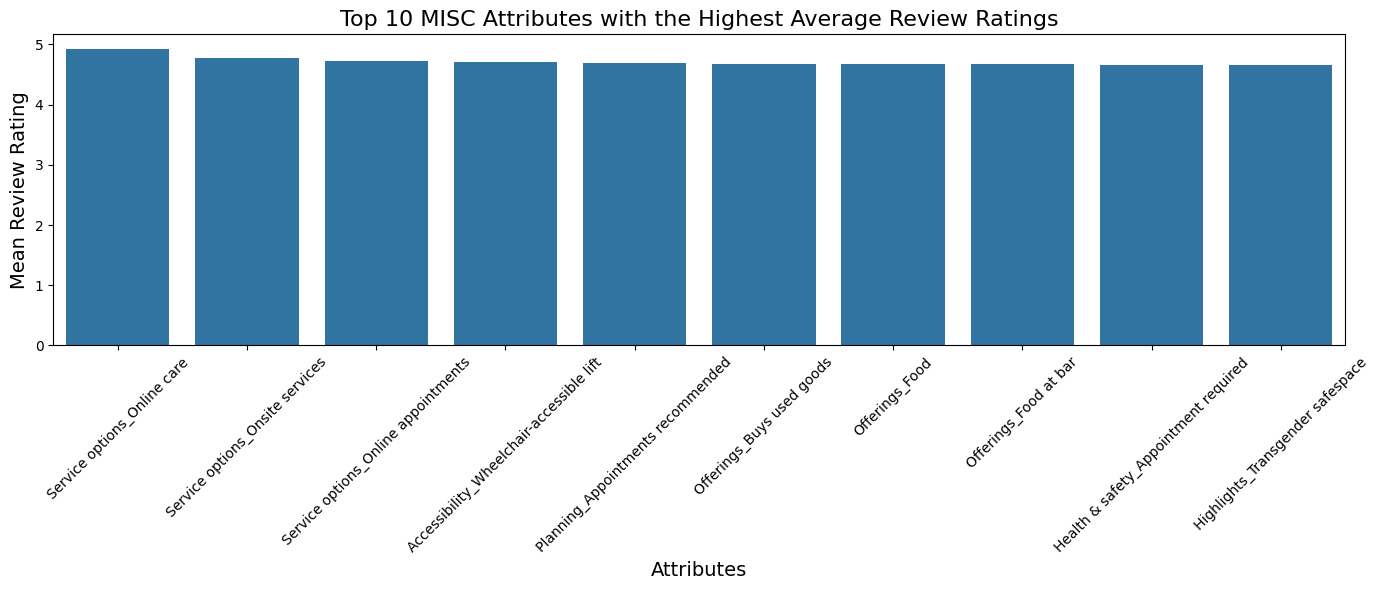

In [350]:

# Sort the DataFrame without using inplace and assign it back to attribute_summary
attribute_summary = attribute_summary.sort_values(by='average_review', ascending=False)

# Select the top 10 attributes with the highest average review ratings
Top_10 = attribute_summary.head(10)

# Set the plot size
plt.figure(figsize=(14, 6))

# Create a bar plot using Seaborn
sns.barplot(data=Top_10, x='attribute', y='average_review')

# Customize the plot
plt.title('Top 10 MISC Attributes with the Highest Average Review Ratings', fontsize=16)
plt.xlabel('Attributes', fontsize=14)
plt.ylabel('Mean Review Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Location

In [351]:
aggregated_df = merged_df.groupby(['gmap_id', 'latitude', 'longitude']).agg({'review_rating': 'mean'}).reset_index()

# Initialize a Folium map centered at the average location
map_center = [aggregated_df['latitude'].mean(), aggregated_df['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Define a colormap
colormap = linear.YlGnBu_09.scale(aggregated_df['review_rating'].min(), aggregated_df['review_rating'].max())

for _, row in aggregated_df.iterrows():
    color = colormap(row['review_rating'])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,  # Fixed size for simplicity
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Gmap ID: {row['gmap_id']}<br>Average Rating: {row['review_rating']:.1f}"
    ).add_to(mymap)

# Add a color scale legend to the map
colormap.caption = 'Average Rating'
colormap.add_to(mymap)


# To display the map in Jupyter Notebook (if applicable)
mymap

## if business responds 

In [352]:
# Aggregate data
aggregated_df = merged_df.groupby(['gmap_id']).agg(
    count=('gmap_id', 'size'),
    average_review=('review_rating', 'mean'),
    response_count=('if_response', lambda x: (x == 'Y').sum())
).reset_index()

aggregated_df['response_rate'] = (aggregated_df['response_count'] / aggregated_df['count']) * 100

aggregated_df.head()



,gmap_id,count,average_review,response_count,response_rate
0,0x54cde72868493ca5:0x3bed623bec4c43e3,128,4.148438,0,0.000000
1,0x54d400a3503bf3cb:0x6f54a8d273995ade,64,4.656250,52,81.250000
2,0x54d4ecda5872a3d3:0x133d4cc056e83ab4,58,4.034483,0,0.000000
3,0x808327b71461d6bb:0x7e1165558a98f648,197,4.710660,8,4.060914
4,0x8083ff64283d3aab:0x278c940d94dac24d,213,4.615023,2,0.938967


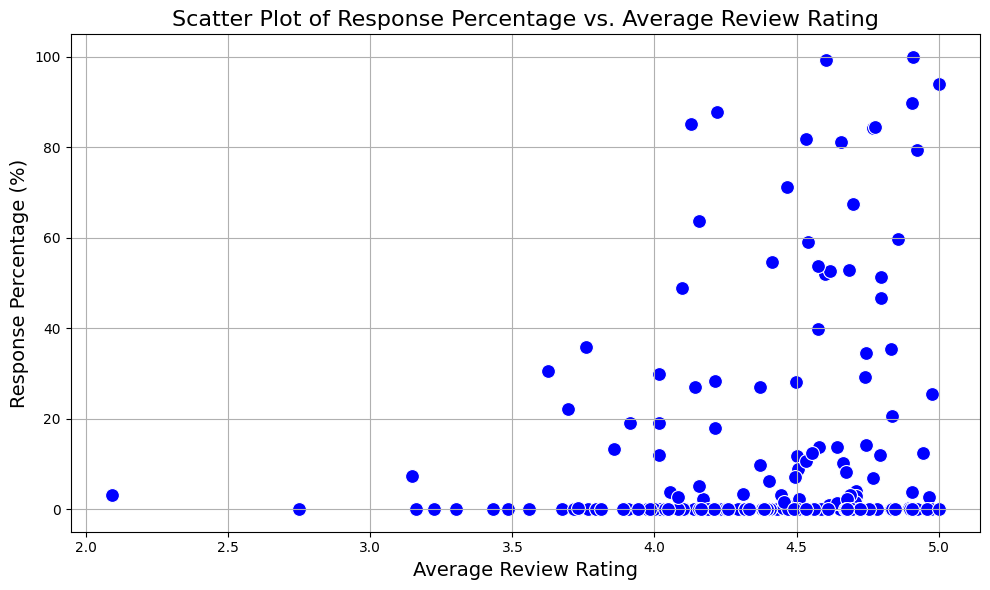

In [353]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot of response percentage and average rating
sns.scatterplot(data=aggregated_df, x='average_review', y='response_rate', s=100, color='b')

# Customize the plot
plt.title('Scatter Plot of Response Percentage vs. Average Review Rating', fontsize=16)
plt.xlabel('Average Review Rating', fontsize=14)
plt.ylabel('Response Percentage (%)', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## price 

In [354]:
merged_df["price"].unique()

array([None, '$$', '$', '₩₩', '$$$', '₩'], dtype=object)

In [355]:
def encode_price(price):
    encoding_map = {
        '₩': 1,
        '₩₩': 2,
        '$': 3,
        '$$': 4,
        '$$$': 5
    }
    return encoding_map.get(price, np.nan)  # Return np.nan for None or any other unexpected value


C:\Users\micha\AppData\Local\Temp\ipykernel_27024\1563007717.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aggregated_df, y='average_review', x='encoded_price', palette='viridis')


<Figure size 1400x1000 with 0 Axes>

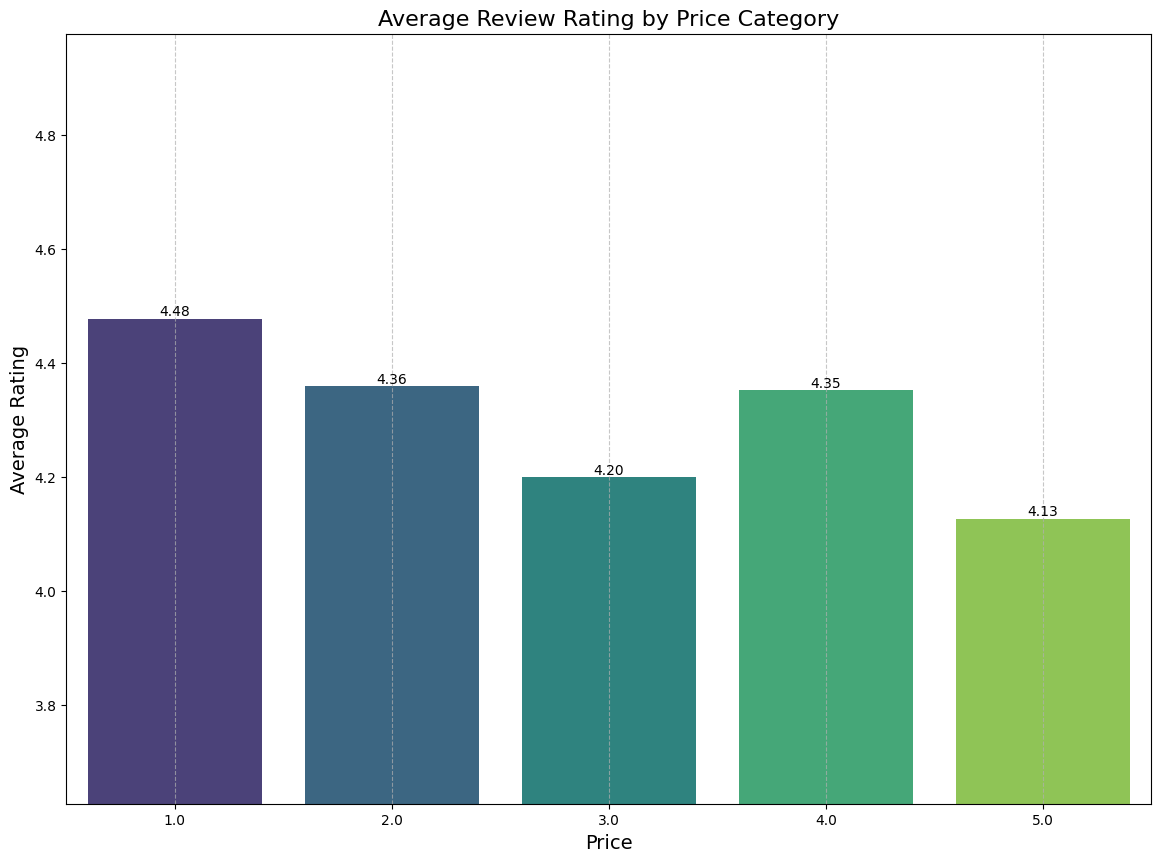

In [356]:
# Aggregate data
merged_df['encoded_price'] = merged_df['price'].apply(encode_price)
aggregated_df = merged_df.groupby(['encoded_price']).agg(
    count=('encoded_price', 'size'),
    average_review=('review_rating', 'mean')
).reset_index()

# Sort the DataFrame based on average review rating
aggregated_df = aggregated_df.sort_values(by='average_review', ascending=False)

# Set the plot size
plt.figure(figsize=(14, 10))

# Set the plot size
plt.figure(figsize=(14, 10))

# Create a horizontal bar chart with categorical x-axis
sns.barplot(data=aggregated_df, y='average_review', x='encoded_price', palette='viridis')

# Add labels on bars correctly aligned
for index, row in aggregated_df.iterrows():
    plt.text(x=index, y=row['average_review'], s=f'{row["average_review"]:.2f}', 
             va='bottom', ha='center', fontsize=10, color='black')
    
# Adjust the y-axis limit to emphasize differences (zoom in)
plt.ylim(aggregated_df['average_review'].min() - 0.5, aggregated_df['average_review'].max() + 0.5)

# Customize the plot
plt.title('Average Review Rating by Price Category', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

## Category 

In [382]:
merged_df = pd.merge(review_df, meta_df, on='gmap_id', how='left')
columns = ['avg_rating', 'num_of_reviews', 'state', 'relative_results']
merged_df = merged_df.drop(columns=columns)


In [388]:
merged_df.tail()

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response,year,month,...,name,address,description,latitude,longitude,category,price,hours,MISC,url
36685,0x80905438e7a68127:0x2e26848e298b63e0,115700147229249621219,2019-03-30 06:02:57,5,none,Y,[],N,2019,2019-03,...,Jack in the Box,"Jack in the Box, 900 Oakdale Rd, Modesto, CA 9...","Burgers, chicken, tacos & breakfast items fill...",37.654955,-120.95715,"[Fast food restaurant, Breakfast restaurant, C...",$,"[[Sunday, Open 24 hours], [Monday, Open 24 hou...","{'Service options': ['No-contact delivery', 'D...",https://www.google.com/maps/place//data=!4m2!3...
36686,0x80905438e7a68127:0x2e26848e298b63e0,102627220414820317210,2019-11-08 20:35:55,5,none,Y,[],N,2019,2019-11,...,Jack in the Box,"Jack in the Box, 900 Oakdale Rd, Modesto, CA 9...","Burgers, chicken, tacos & breakfast items fill...",37.654955,-120.95715,"[Fast food restaurant, Breakfast restaurant, C...",$,"[[Sunday, Open 24 hours], [Monday, Open 24 hou...","{'Service options': ['No-contact delivery', 'D...",https://www.google.com/maps/place//data=!4m2!3...
36687,0x80905438e7a68127:0x2e26848e298b63e0,100304899976700640022,2018-07-22 05:30:15,4,none,Y,[],N,2018,2018-07,...,Jack in the Box,"Jack in the Box, 900 Oakdale Rd, Modesto, CA 9...","Burgers, chicken, tacos & breakfast items fill...",37.654955,-120.95715,"[Fast food restaurant, Breakfast restaurant, C...",$,"[[Sunday, Open 24 hours], [Monday, Open 24 hou...","{'Service options': ['No-contact delivery', 'D...",https://www.google.com/maps/place//data=!4m2!3...
36688,0x80905438e7a68127:0x2e26848e298b63e0,108838225626760376961,2019-05-09 04:08:17,3,none,Y,[],Y,2019,2019-05,...,Jack in the Box,"Jack in the Box, 900 Oakdale Rd, Modesto, CA 9...","Burgers, chicken, tacos & breakfast items fill...",37.654955,-120.95715,"[Fast food restaurant, Breakfast restaurant, C...",$,"[[Sunday, Open 24 hours], [Monday, Open 24 hou...","{'Service options': ['No-contact delivery', 'D...",https://www.google.com/maps/place//data=!4m2!3...
36689,0x80905438e7a68127:0x2e26848e298b63e0,106551113624754850980,2021-01-01 12:27:00,4,none,Y,[],N,2021,2021-01,...,Jack in the Box,"Jack in the Box, 900 Oakdale Rd, Modesto, CA 9...","Burgers, chicken, tacos & breakfast items fill...",37.654955,-120.95715,"[Fast food restaurant, Breakfast restaurant, C...",$,"[[Sunday, Open 24 hours], [Monday, Open 24 hou...","{'Service options': ['No-contact delivery', 'D...",https://www.google.com/maps/place//data=!4m2!3...


In [392]:
# Flatten the lists and count occurrences, handle None values
flat_categories = [category for sublist in merged_df['category'].dropna() for category in sublist]

# Create a Series from the flattened categories and count occurrences
category_counts = pd.Series(flat_categories).value_counts()

# Display category counts
print(category_counts)

Restaurant                   5507
Fast food restaurant         4446
Breakfast restaurant         3892
Mexican restaurant           3675
Chicken restaurant           2860
                             ... 
Temp agency                    53
Recruiter                      53
Employment search service      53
Employment center              53
Employment agency              53
Name: count, Length: 298, dtype: int64


In [394]:

# Create a dictionary mapping categories to their counts
category_count_dict = category_counts.to_dict()

# Define a function to replace categories with the most frequent one
def assign_most_frequent_category(categories):
    if not categories:
        return None
    if len(categories) == 1:
        return categories[0]
    # Find the most frequent category based on the count dictionary
    sorted_categories = sorted(categories, key=lambda x: category_count_dict.get(x, 0), reverse=True)
    return sorted_categories[0]

# Apply the function to transform the 'category' column
merged_df['transformed_category'] = merged_df['category'].apply(lambda x: assign_most_frequent_category(x))


In [395]:
merged_df.columns

Index(['gmap_id', 'user_id', 'time', 'review_rating', 'review_text', 'if_pic',
       'pic_dim', 'if_response', 'year', 'month', 'if_text', 'name', 'address',
       'description', 'latitude', 'longitude', 'category', 'price', 'hours',
       'MISC', 'url', 'transformed_category'],
      dtype='object')

C:\Users\micha\AppData\Local\Temp\ipykernel_27024\1936862775.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom_5, y='transformed_category', x='average_review', palette=colors)


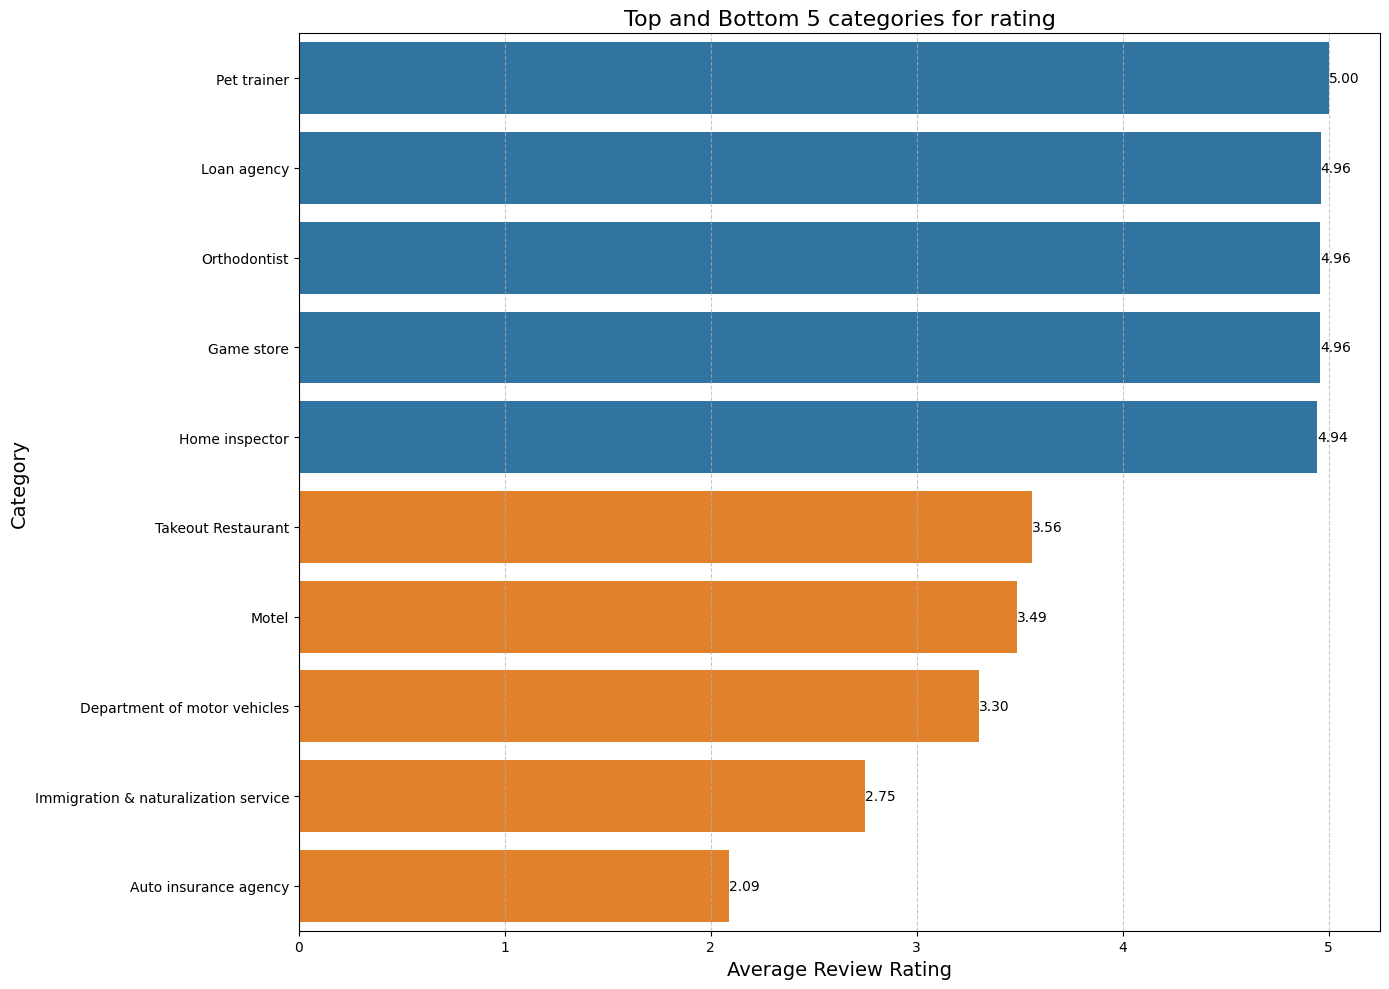

In [396]:

# Aggregate data
aggregated_df = merged_df.groupby(['transformed_category']).agg(
    count=('transformed_category', 'size'),
    average_review=('review_rating', 'mean')
).reset_index()

# Sort and filter
aggregated_df = aggregated_df.sort_values(by='average_review', ascending=False)
top_5 = aggregated_df.head(5)
bottom_5 = aggregated_df.tail(5)
top_bottom_5 = pd.concat([top_5, bottom_5])

# Define color palette
colors = ['#1f77b4'] * len(top_5) + ['#ff7f0e'] * len(bottom_5)  # Blue for top 5, Orange for bottom 5

# Set the plot size
plt.figure(figsize=(14, 10))

# Create a horizontal bar chart with custom colors
sns.barplot(data=top_bottom_5, y='transformed_category', x='average_review', palette=colors)

# Add labels on bars
for index, value in enumerate(top_bottom_5['average_review']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')

# Customize the plot
plt.title('Top and Bottom 5 categories for rating', fontsize=16)
plt.xlabel('Average Review Rating', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [398]:
len(merged_df['transformed_category'].unique())



105

In [399]:
# Read the countvec_test.txt file
with open('countvec_test.txt', 'r') as file:
    countvec_test_data = file.readlines()

In [400]:
aggregated_review_df = review_df.groupby('gmap_id').agg(
    review_count=('gmap_id', 'size'),
    user_count = ('user_id', 'size'),
    time_count = ('time', 'median'),
    avg_rating = ('review_rating', 'mean'),
    review_text_count=('review_text', lambda x: (x != 'none').sum()),
    pic_count = ('if_pic', lambda x: (x == 'Y').sum()),
    response_count=('if_response', lambda x: (x == 'Y').sum()),

)

# Convert the read lines into a DataFrame
countvec_test_df = pd.DataFrame([line.strip().split() for line in countvec_test_data])
countvec_test_df.rename(columns ={0: 'gmap_id'}, inplace=True)

# Read the test_vocab.txt file
test_vocab_df = pd.read_csv('test_vocab.txt', delimiter=':', header=None, names=['word', 'index'])

# Display the first few rows of each DataFrame to verify
print(countvec_test_df.head())
print(test_vocab_df.head())


                                 gmap_id         1        2        3        4  \
0  0x54cde72868493ca5:0x3bed623bec4c43e3  1404:44,   302:4,   208:3,   323:1,   
1  0x808327b71461d6bb:0x7e1165558a98f648    673:2,  1996:1,   539:6,   631:2,   
2  0x8083ff64283d3aab:0x278c940d94dac24d    673:6,  1996:2,   539:1,   631:1,   
3  0x8084481ecb286ce3:0x9621a5cee38c4ec2    673:4,  1996:1,   539:1,   631:2,   
4   0x80844820b85359e3:0xff414747a10c915    673:6,  1996:2,  539:13,  631:27,   

        5        6         7         8         9  ...  1254  1255  1256  1257  \
0  673:1,  1996:2,    539:4,    588:1,   1651:5,  ...  None  None  None  None   
1  467:7,  2094:2,    722:2,    610:4,  1140:29,  ...  None  None  None  None   
2  467:5,  2171:1,   2094:4,  1327:10,    722:3,  ...  None  None  None  None   
3  467:3,   610:1,   1140:3,    685:6,   1154:1,  ...  None  None  None  None   
4  467:6,  2171:1,  2094:13,  1318:12,   1327:1,  ...  None  None  None  None   

   1258  1259  1260  1261 

In [401]:
aggregated_review_df.to_csv('temp2.csv')

In [402]:
combined_vec_df = pd.merge(countvec_test_df, aggregated_review_df, on='gmap_id', how='left')
combined_vec_df.head()

,gmap_id,1,2,3,4,5,6,7,8,9,...,1261,1262,1263,review_count,user_count,time_count,avg_rating,review_text_count,pic_count,response_count
0,0x54cde72868493ca5:0x3bed623bec4c43e3,"1404:44,","302:4,","208:3,","323:1,","673:1,","1996:2,","539:4,","588:1,","1651:5,",...,None,None,None,128,128,2019-01-28 04:49:09.500,4.148438,72,0,0
1,0x808327b71461d6bb:0x7e1165558a98f648,"673:2,","1996:1,","539:6,","631:2,","467:7,","2094:2,","722:2,","610:4,","1140:29,",...,None,None,None,197,197,2019-04-12 11:14:22.000,4.710660,146,7,8
2,0x8083ff64283d3aab:0x278c940d94dac24d,"673:6,","1996:2,","539:1,","631:1,","467:5,","2171:1,","2094:4,","1327:10,","722:3,",...,None,None,None,213,213,2018-07-20 14:01:03.000,4.615023,137,4,2
3,0x8084481ecb286ce3:0x9621a5cee38c4ec2,"673:4,","1996:1,","539:1,","631:2,","467:3,","610:1,","1140:3,","685:6,","1154:1,",...,None,None,None,75,75,2019-09-03 14:53:21.000,4.600000,42,0,39
4,0x80844820b85359e3:0xff414747a10c915,"673:6,","1996:2,","539:13,","631:27,","467:6,","2171:1,","2094:13,","1318:12,","1327:1,",...,None,None,None,434,434,2020-06-14 20:31:23.500,3.301843,279,6,0


In [403]:
combined_vec_df['avg_rating'].unique()

array([4.1484375 , 4.7106599 , 4.61502347, 4.6       , 3.30184332,
       4.94329897, 4.74358974, 4.2244898 , 4.70895522, 4.32635983,
       4.37219451, 4.92261905, 4.9754902 , 4.10594796, 3.90510949,
       4.51282051, 4.46548323, 4.65306122, 4.17112299, 4.46385542,
       3.9137931 , 4.05347594, 4.68518519, 4.12765957, 3.88888889,
       4.45138889, 3.85619469, 4.01690821, 3.69507576, 4.89490446,
       4.83561644, 3.71186441, 4.49693252, 4.96575342, 4.41333333,
       3.67391304, 4.30769231, 3.48550725, 4.50340136, 4.69767442,
       4.67346939, 4.57821229, 4.21138211, 4.21212121, 4.47115385,
       4.60475483, 4.68181818, 4.70448549, 3.16      , 4.90510949,
       4.45364238, 4.4962963 , 4.72      , 4.76767677, 4.8313253 ,
       4.30587484, 4.4453125 , 4.84090909, 4.40647482, 4.        ,
       3.43010753, 4.29333333, 4.53370787, 4.64251208, 4.55263158,
       4.31884058, 4.85795455, 4.67045455, 4.03864734, 4.50892857,
       3.796875  , 4.56034483, 4.10204082, 4.14102564, 4.89843

C:\Users\micha\AppData\Local\Temp\ipykernel_27024\1858034578.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_above_4, x='count', y='word', palette='viridis')


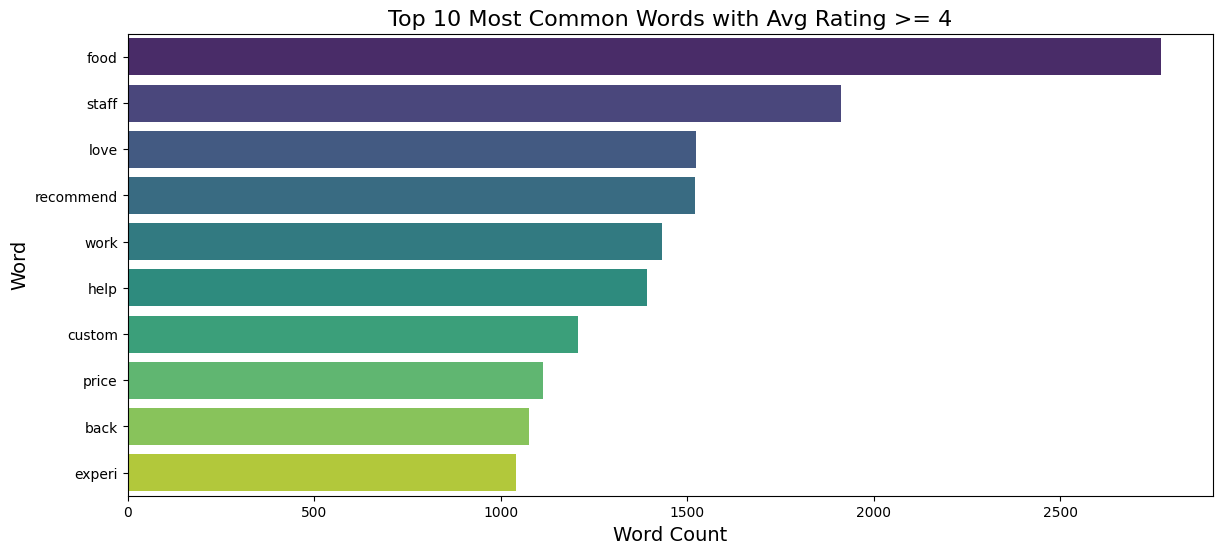

C:\Users\micha\AppData\Local\Temp\ipykernel_27024\1858034578.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_below_4, x='count', y='word', palette='magma')


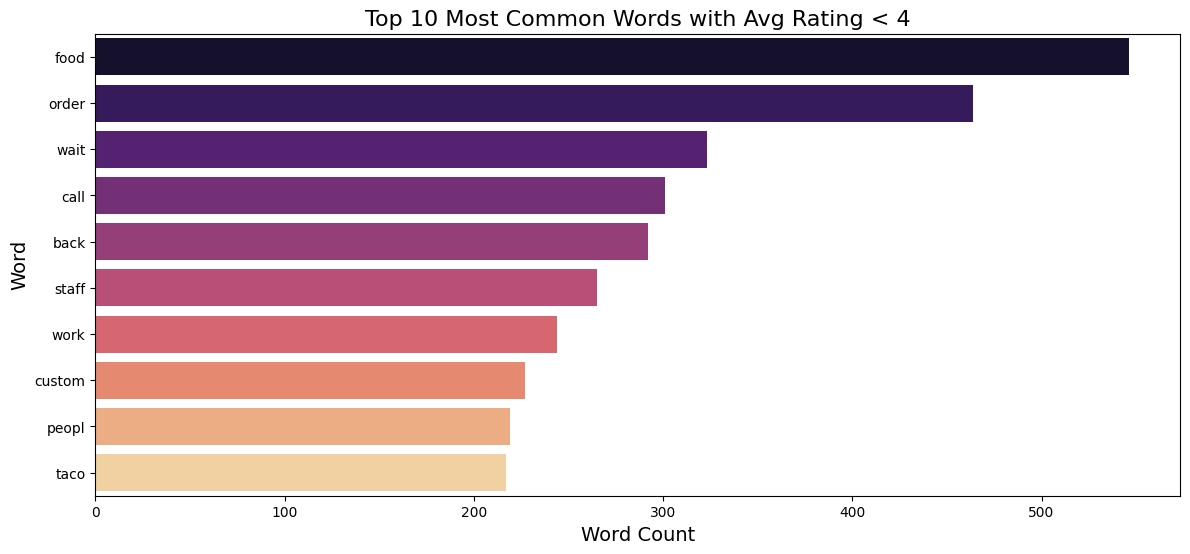

In [414]:


# Assume 'combined_vec_df' is your DataFrame containing word indices

# Step 1: Create a dictionary from the text document
word_dict = {}
with open('test_vocab.txt', 'r') as file:
    for line in file:
        word, index = line.strip().split(':')
        word_dict[index] = word

# Step 2: Initialize dictionaries to hold word counts for ratings above and below 4
word_count_above_4 = defaultdict(int)
word_count_below_4 = defaultdict(int)

# Step 3: Iterate through each row in the DataFrame and replace indices with words
for _, row in combined_vec_df.iterrows():
    if pd.notna(row['avg_rating']):
        # Determine which dictionary to use based on the rating
        if row['avg_rating'] >= 4:
            target_dict = word_count_above_4
        else:
            target_dict = word_count_below_4
        
        # Iterate over each relevant column to extract word counts
        for col in combined_vec_df.columns[1:]:
            # Convert the value to a string and check if it's valid
            value = str(row[col])
            if value != 'None' and value.strip():
                word_counts = value.split(',')
                for wc in word_counts:
                    # Check if the string is in the correct format (exactly one colon)
                    parts = wc.split(':')
                    if len(parts) == 2:
                        index, count = parts
                        try:
                            # Use the dictionary to replace index with word
                            word = word_dict.get(index, f"unknown_{index}")
                            target_dict[word] += int(count)
                        except ValueError:
                            # Skip if count is not a valid integer
                            continue

# Step 4: Convert dictionaries to DataFrames
df_above_4 = pd.DataFrame(list(word_count_above_4.items()), columns=['word', 'count'])
df_below_4 = pd.DataFrame(list(word_count_below_4.items()), columns=['word', 'count'])

# Step 5: Sort to get top 10 for each group
df_above_4 = df_above_4.sort_values(by='count', ascending=False).head(10)
df_below_4 = df_below_4.sort_values(by='count', ascending=False).head(10)

# Plotting for words with average rating above 4
plt.figure(figsize=(14, 6))
sns.barplot(data=df_above_4, x='count', y='word', palette='viridis')
plt.title('Top 10 Most Common Words with Avg Rating >= 4', fontsize=16)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.show()

# Plotting for words with average rating below 4
plt.figure(figsize=(14, 6))
sns.barplot(data=df_below_4, x='count', y='word', palette='magma')
plt.title('Top 10 Most Common Words with Avg Rating < 4', fontsize=16)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.show()


C:\Users\micha\AppData\Local\Temp\ipykernel_27024\761900009.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_positive_words, x='word', y='average_rating', palette='viridis')


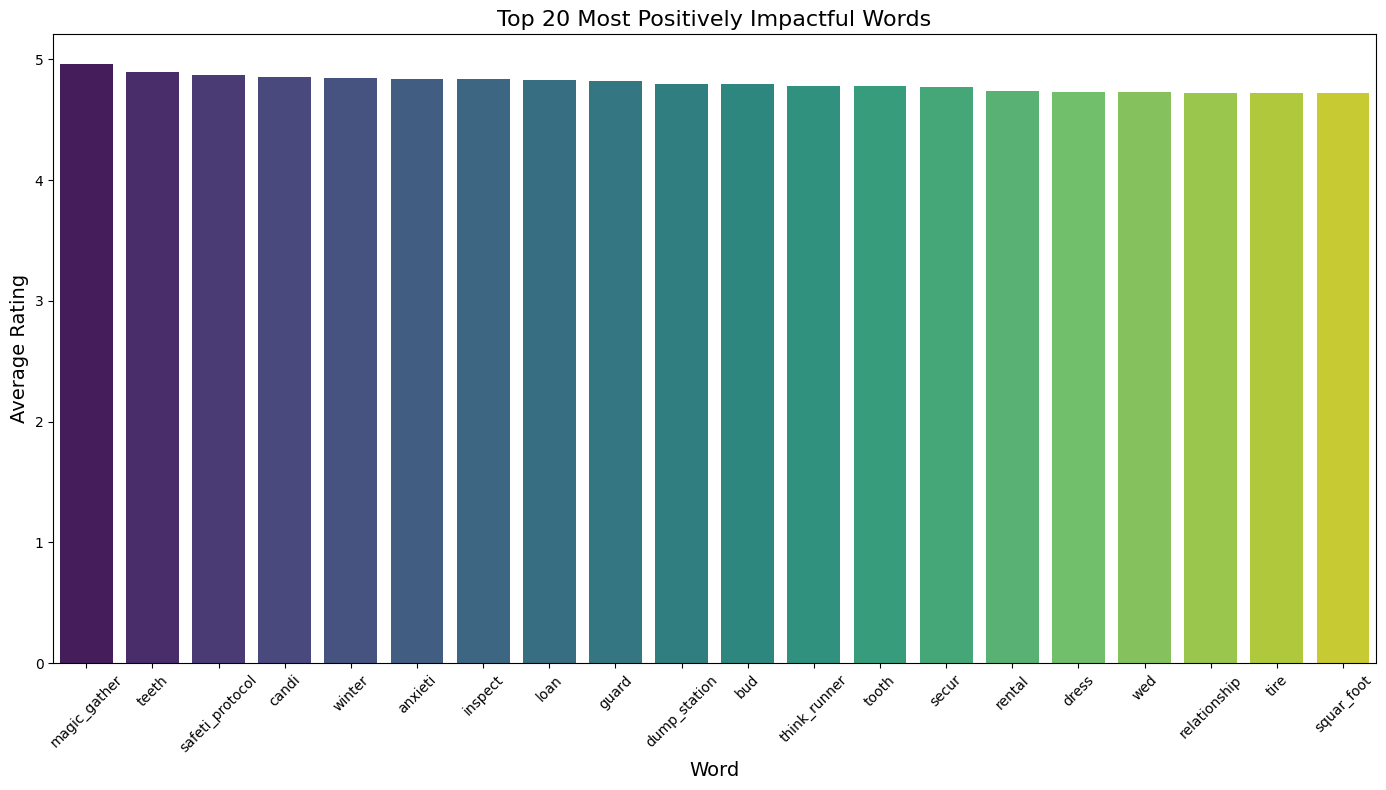

C:\Users\micha\AppData\Local\Temp\ipykernel_27024\761900009.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_negative_words, x='word', y='average_rating', palette='magma')


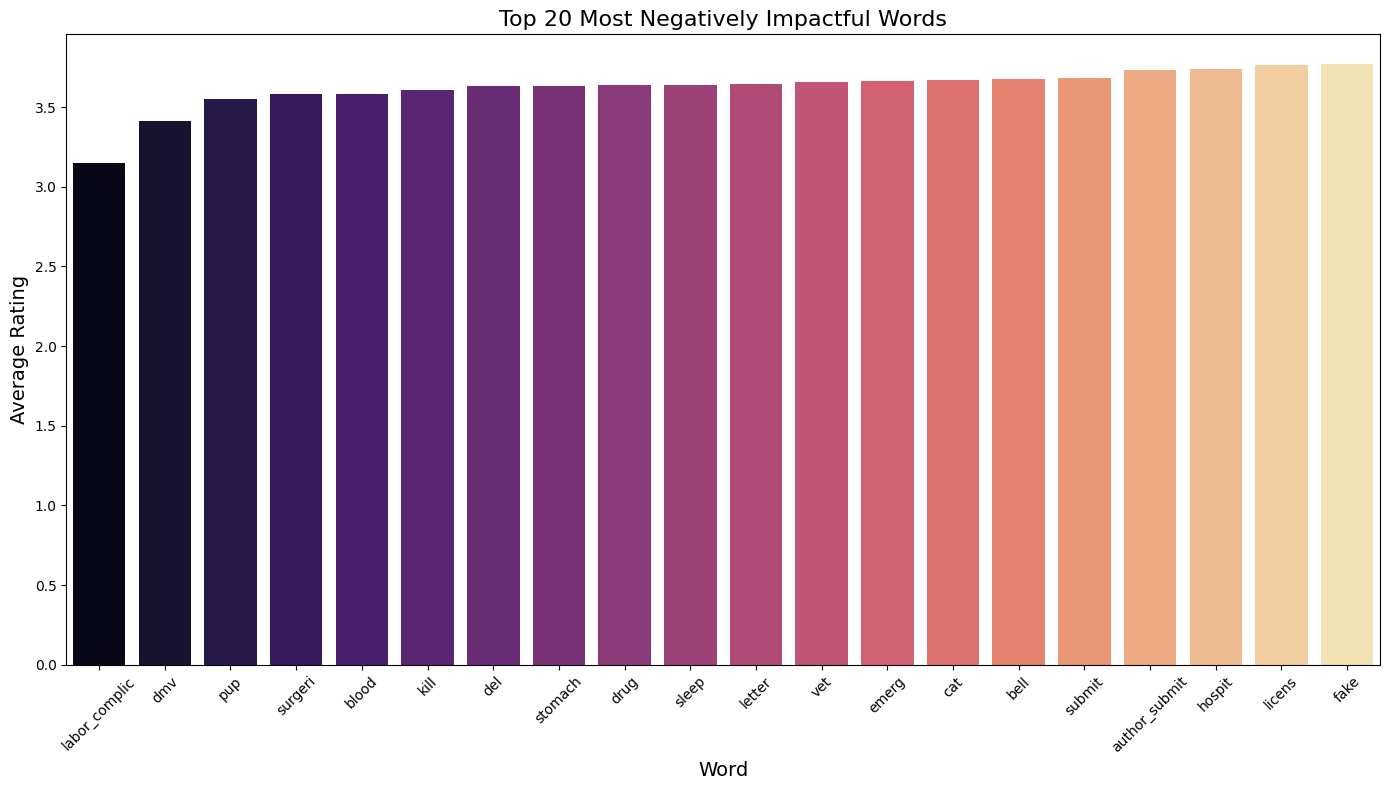

In [425]:

# Assume 'combined_vec_df' is your DataFrame containing word indices

# Step 1: Create a dictionary from the text document
word_dict = {}
with open('test_vocab.txt', 'r') as file:
    for line in file:
        word, index = line.strip().split(':')
        word_dict[index] = word

# Step 2: Initialize dictionaries to hold word counts and rating sums
word_count = defaultdict(int)
word_rating_sum = defaultdict(float)

# Step 3: Iterate through each row in the DataFrame to accumulate counts and ratings
for _, row in combined_vec_df.iterrows():
    if pd.notna(row['avg_rating']):
        avg_rating = row['avg_rating']
        
        # Iterate over each relevant column to extract word counts
        for col in combined_vec_df.columns[1:]:
            # Convert the value to a string and check if it's valid
            value = str(row[col])
            if value != 'None' and value.strip():
                word_counts = value.split(',')
                for wc in word_counts:
                    # Check if the string is in the correct format (exactly one colon)
                    parts = wc.split(':')
                    if len(parts) == 2:
                        index, count = parts
                        try:
                            # Use the dictionary to replace index with word
                            word = word_dict.get(index, f"unknown_{index}")
                            count = int(count)
                            word_count[word] += count
                            word_rating_sum[word] += avg_rating * count
                        except ValueError:
                            # Skip if count is not a valid integer
                            continue

# Step 4: Calculate the average rating per word
word_avg_rating = {word: word_rating_sum[word] / word_count[word] for word in word_count}

# Convert to DataFrame
df_word_ratings = pd.DataFrame(list(word_avg_rating.items()), columns=['word', 'average_rating'])
df_word_ratings['count'] = df_word_ratings['word'].map(word_count)

# Filter to include only words that appear more than twice
df_word_ratings = df_word_ratings[df_word_ratings['count'] > 2]

# Step 5: Sort to get top 20 positive and negative impactful words
top_positive_words = df_word_ratings.sort_values(by='average_rating', ascending=False).head(20)
top_negative_words = df_word_ratings.sort_values(by='average_rating', ascending=True).head(20)

# Plotting for most positively impactful words
plt.figure(figsize=(14, 8))
sns.barplot(data=top_positive_words, x='word', y='average_rating', palette='viridis')
plt.title('Top 20 Most Positively Impactful Words', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting for most negatively impactful words
plt.figure(figsize=(14, 8))
sns.barplot(data=top_negative_words, x='word', y='average_rating', palette='magma')
plt.title('Top 20 Most Negatively Impactful Words', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
    
### 5.1. How is xxxx related to xxxx? <a class="anchor" name="DI1"></a>

<div class="alert alert-block alert-info">
    
### 5.2. How does xxxxxx impact the rating of a business? <a class="anchor" name="DI1"></a>

<div class="alert alert-block alert-warning">

## 6.  Data Analysis <a class="anchor" name="summary"></a>

 </div>

Based on the analysis above, we investigate questions on:
........
Our findings are:
.......

These findings tell us:
.......

 

<div class="alert alert-block alert-warning"> 

## 7. References <a class="anchor" name="Ref"></a>

</div>